In [1]:
# import packages
using LinearAlgebra
using Distributions
using PyPlot
using PGFPlotsX
using LaTeXStrings
using Contour
using CSV
using DataFrames

In [2]:
data_vbp        = CSV.read("data/boston-vbp.csv", DataFrame)
data_bbb_global = CSV.read("data/boston-bbb-global.csv", DataFrame)
data_bbb_local  = CSV.read("data/boston-bbb-local.csv", DataFrame);

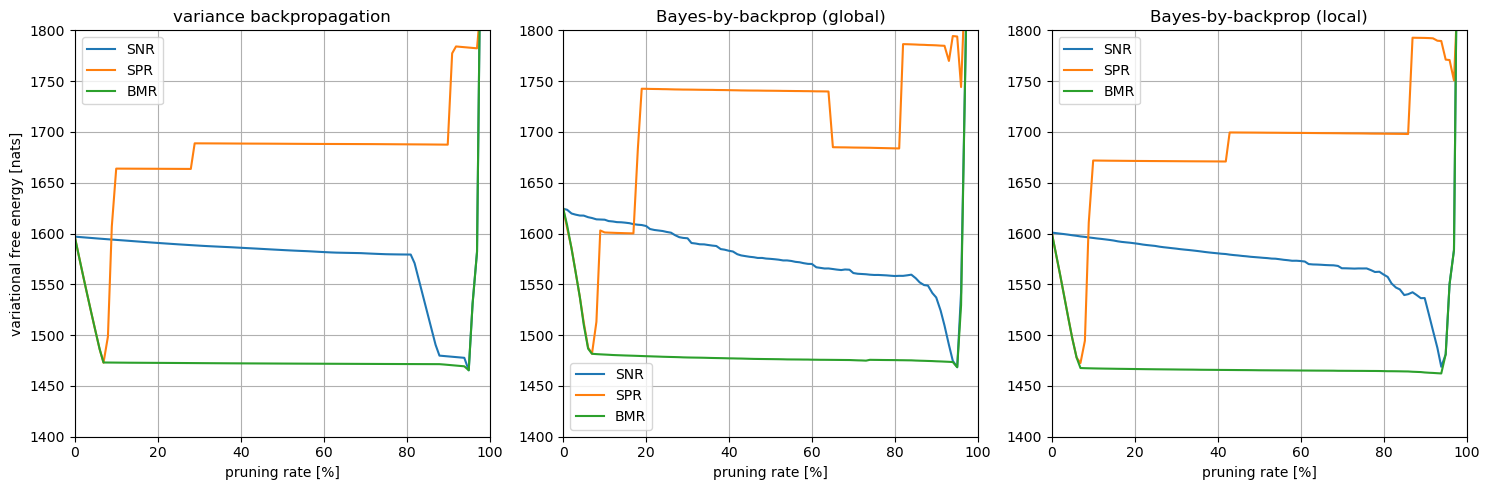

In [3]:
# plot results
fig, ax = plt.subplots(ncols=3, figsize=(15,5))
ax[1].plot(data_vbp[!, "fraction"].*100, data_vbp[!, "observed snr"], label="SNR")
ax[1].plot(data_vbp[!, "fraction"].*100, data_vbp[!, "observed spr"], label="SPR")
ax[1].plot(data_vbp[!, "fraction"].*100, data_vbp[!, "observed bmr"], label="BMR")
ax[2].plot(data_bbb_global[!, "fraction"].*100, data_bbb_global[!, "observed snr"], label="SNR")
ax[2].plot(data_bbb_global[!, "fraction"].*100, data_bbb_global[!, "observed spr"], label="SPR")
ax[2].plot(data_bbb_global[!, "fraction"].*100, data_bbb_global[!, "observed bmr"], label="BMR")
ax[3].plot(data_bbb_local[!, "fraction"].*100, data_bbb_local[!, "observed snr"], label="SNR")
ax[3].plot(data_bbb_local[!, "fraction"].*100, data_bbb_local[!, "observed spr"], label="SPR")
ax[3].plot(data_bbb_local[!, "fraction"].*100, data_bbb_local[!, "observed bmr"], label="BMR")
ax[1].set_title("variance backpropagation"), ax[2].set_title("Bayes-by-backprop (global)"), ax[3].set_title("Bayes-by-backprop (local)")
ax[1].set_ylabel("variational free energy [nats]")
ax[1].set_xlabel("pruning rate [%]")
ax[2].set_xlabel("pruning rate [%]")
ax[3].set_xlabel("pruning rate [%]")
ax[1].grid(), ax[2].grid(), ax[3].grid()
ax[1].set_xlim(0, 100), ax[2].set_xlim(0, 100), ax[3].set_xlim(0, 100)
ax[1].set_ylim(1400, 1800), ax[2].set_ylim(1400, 1800), ax[3].set_ylim(1400, 1800)
ax[1].legend(), ax[2].legend(), ax[3].legend()
plt.tight_layout()

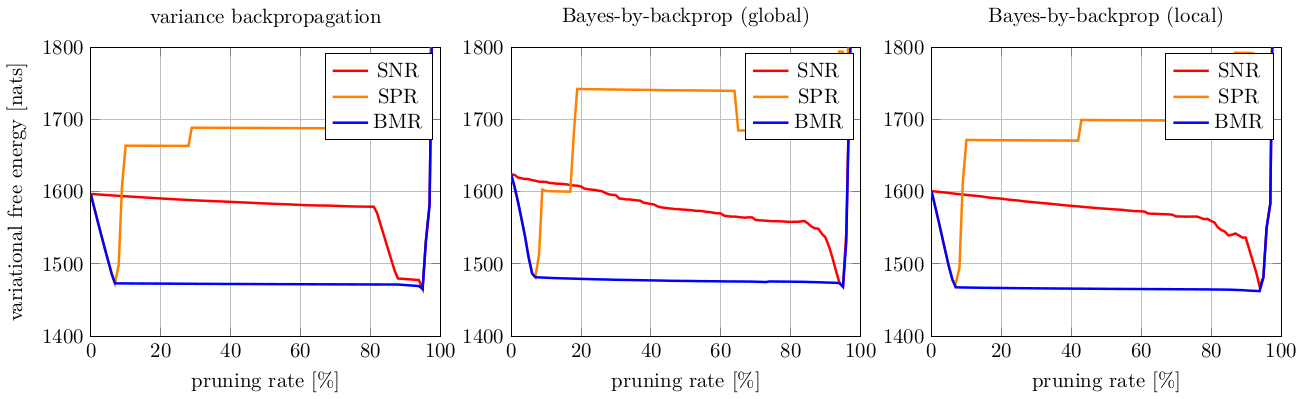

In [4]:
plt_comparison = @pgf GroupPlot(
    # group plot options
    {
        group_style = {
            group_size = "3 by 1",
            horizontal_sep = "1.2cm",
        },
        width = "7.5cm"
    },

    # axis 1 (variance backpropagation)
    {
        xlabel=raw"pruning rate [\%]",
        ylabel=raw"variational free energy [nats]",
        title = "variance backpropagation",
        ymin = 1400,
        ymax = 1800,
        xmin = 0,
        xmax = 100,
        y_tick_label_style = {
            "/pgf/number_format/1000_sep" = "",
        },
        grid = "major",
    },
    # plots for axis 1
    Plot(
        {
            very_thick,
            color = "red"
        },
        Table(
            x = data_vbp[!, "fraction"] .* 100,
            y = data_vbp[!, "observed snr"],
        )
    ),
    LegendEntry("SNR"),
    Plot(
        {
            very_thick,
            color = "orange"
        },
        Table(
            x = data_vbp[!, "fraction"] .* 100,
            y = data_vbp[!, "observed spr"],
        )
    ),
    LegendEntry("SPR"),
    Plot(
        {
            very_thick,
            color = "blue"
        },
        Table(
            x = data_vbp[!, "fraction"] .* 100,
            y = data_vbp[!, "observed bmr"],
        )
    ),
    LegendEntry("BMR"),

    # axis 2 (Bayes-by-backprop (global))
    {
        xlabel=raw"pruning rate [\%]",
        title = "Bayes-by-backprop (global)",
        ymin = 1400,
        ymax = 1800,
        xmin = 0,
        xmax = 100,
        y_tick_label_style = {
            "/pgf/number_format/1000_sep" = "",
        },
        grid = "major",
    },
    Plot(
        {
            very_thick,
            color = "red"
        },
        Table(
            x = data_bbb_global[!, "fraction"] .* 100,
            y = data_bbb_global[!, "observed snr"],
        )
    ),
    LegendEntry("SNR"),
    Plot(
        {
            very_thick,
            color = "orange"
        },
        Table(
            x = data_bbb_global[!, "fraction"] .* 100,
            y = data_bbb_global[!, "observed spr"],
        )
    ),
    LegendEntry("SPR"),
    Plot(
        {
            very_thick,
            color = "blue"
        },
        Table(
            x = data_bbb_global[!, "fraction"] .* 100,
            y = data_bbb_global[!, "observed bmr"],
        )
    ),
    LegendEntry("BMR"),

    # axis 3 (Bayes-by-backprop (local))
    { 
        xlabel=raw"pruning rate [\%]",
        title = "Bayes-by-backprop (local)",
        ymin = 1400,
        ymax = 1800,
        xmin = 0,
        xmax = 100,
        y_tick_label_style = {
            "/pgf/number_format/1000_sep" = "",
        },
        grid = "major",
    },
    # plots for axis 3
    Plot(
        {
            very_thick,
            color = "red"
        },
        Table(
            x = data_bbb_local[!, "fraction"] .* 100,
            y = data_bbb_local[!, "observed snr"],
        )
    ),
    LegendEntry("SNR"),
    Plot(
        {
            very_thick,
            color = "orange"
        },
        Table(
            x = data_bbb_local[!, "fraction"] .* 100,
            y = data_bbb_local[!, "observed spr"],
        )
    ),
    LegendEntry("SPR"),
    Plot(
        {
            very_thick,
            color = "blue"
        },
        Table(
            x = data_bbb_local[!, "fraction"] .* 100,
            y = data_bbb_local[!, "observed bmr"],
        )
    ),
    LegendEntry("BMR"),
)

In [5]:
pgfsave("exports/comparison.tikz", plt_comparison)
pgfsave("exports/comparison.pdf", plt_comparison)